# Midterm Exam - Seminar in Computer Science
### Nicholas Thomson

# Import the dataset

Use pandas librarires to load the dataset in a dataframe.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Split dataframe into diabetic and not diabetic patients

This enables me to easily manipulate the dataframes.

In [3]:
diabetic = df[df['Outcome'] == 1]
not_diabetetic = df[df['Outcome'] == 0]
not_diabetetic.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0


# Creating Bar Charts

### Average Glucose Level by Diabetes Status
Using the filtered dataframes, I can create find the average glucose levels of both diabetic and not diabetic patients. I do this using the mean function. Pyplot enables me to plot these two numbers on a bar chart.

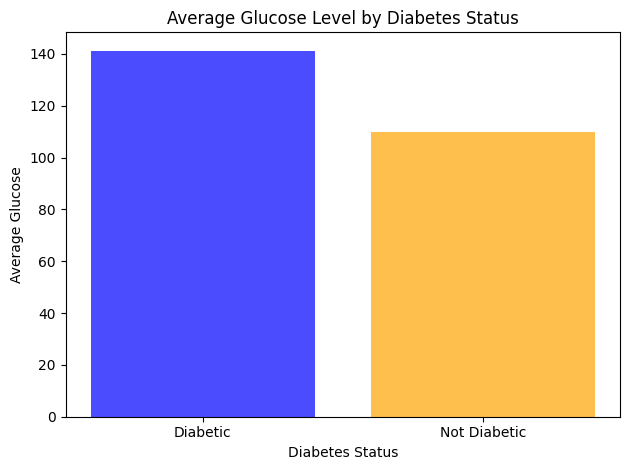

In [4]:
# Create the bar chart
plt.bar(['Diabetic', 'Not Diabetic'], [diabetic['Glucose'].mean(), not_diabetetic['Glucose'].mean()], color = ['blue', 'orange'], alpha=0.7)
plt.xlabel('Diabetes Status')
plt.ylabel('Average Glucose')
plt.title('Average Glucose Level by Diabetes Status')

# Show the bar chart
plt.tight_layout()
plt.show()

### Average Blood Pressure by Diabetes Status
Similarly to the above example, I can create show the average blood pressure of both diabetic and not diabetic patients.

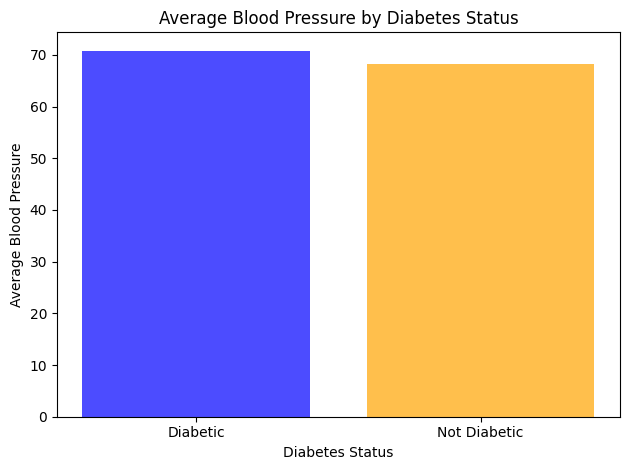

In [5]:
# Create the bar chart
plt.bar(['Diabetic', 'Not Diabetic'], [diabetic['BloodPressure'].mean(), not_diabetetic['BloodPressure'].mean()], color = ['blue', 'orange'], alpha=0.7)
plt.xlabel('Diabetes Status')
plt.ylabel('Average Blood Pressure')
plt.title('Average Blood Pressure by Diabetes Status')

# Show the bar chart
plt.tight_layout()
plt.show()

In [6]:
import numpy as np
from scipy import stats

### Two-Sample t-test
The two-sample t-test is used to compare the means of two independent samples.

1st Hypothesis Test

Null Hypothesis (H0): The average glucose level for people with diabetes is the same as the average glucose level for people without diabetes.

Alternative Hypothesis (H1): The average glucose level for people with diabetes is significantly greater than the average glucose level for people without diabetes.

In [7]:
# Perform two-sample t-test
t_statistic, p_value = stats.ttest_ind(diabetic['Glucose'], not_diabetetic['Glucose'], alternative='greater')

# Print results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: 14.600060005973894
p-value: 4.467715822644957e-43


Because the p-value is less than the chosen significance level, we reject the null hypothesis and conclude that there is sufficient evidence to suggest that the average glucose levels of diabetic group is significantly greater than the average glucose levels of the not diabetic group.

2nd Hypothesis Test

Null Hypothesis (H0): The average blood pressure for people with diabetes is the same as the average blood pressure for people without diabetes.

Alternative Hypothesis (H1): The average blood pressure for people with diabetes is significantly greater than the average blood pressure for people without diabetes.

In [8]:
# Perform two-sample t-test
t_statistic, p_value = stats.ttest_ind(diabetic['BloodPressure'], not_diabetetic['BloodPressure'], alternative='greater')

# Print results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: 1.8047023017353887
p-value: 0.03575695004888041


Because the p-value is not less than the chosen significance level, we don't reject the null hypothesis and don't conclude that there is sufficient evidence to suggest that the average blood pressure of people with diabetes is significantly greater than the average blood pressure of people without diabetes.

# Extra Credit Section

The variable I found to have the closest normal distribution was BMI. I ran the below function on all variables, and they all did not follow a normal distribution.

In [9]:
from scipy.stats import shapiro

In [10]:
# Assuming 'data' is your dataset
statistic, p_value = shapiro(df['DiabetesPedigreeFunction'])

print(f"P-value is: {p_value:.3f}")

# Interpret the results
alpha = 0.05
if p_value > alpha:
    print("Sample looks Gaussian (fail to reject H0)")
else:
    print("Sample does not look Gaussian (reject H0)")

P-value is: 0.000
Sample does not look Gaussian (reject H0)


From every variable, the shapiro returns a P-value less than 0.05. Therefore, no variable is truely on a normal distribution. BMI looked more Gaussian to my eyes, so I plotted it.

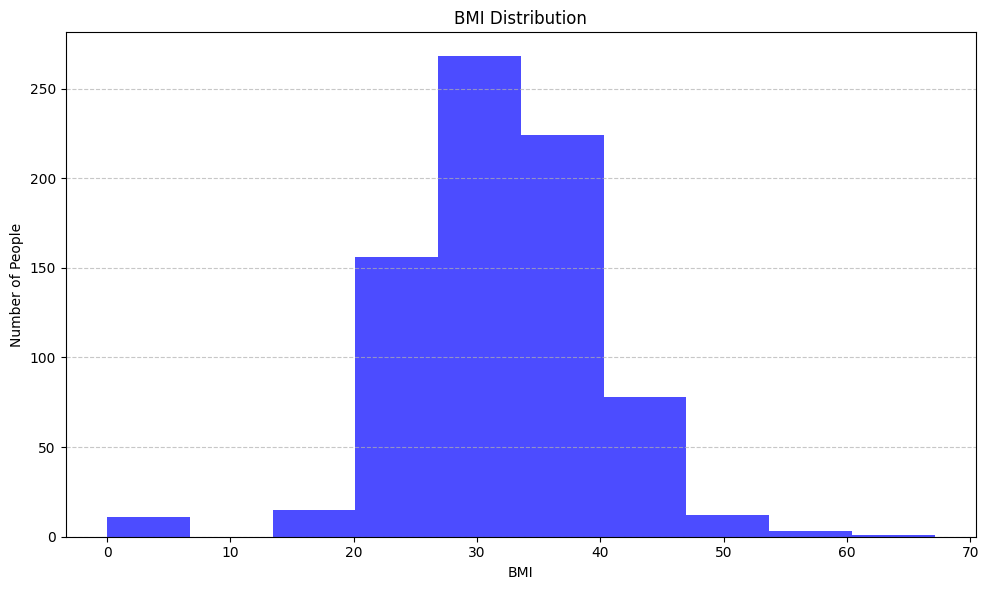

In [11]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the histogram
plt.hist(df['BMI'], bins=10, color='blue', alpha=0.7)
plt.xlabel('BMI')
plt.ylabel('Number of People')
plt.title('BMI Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the histogram
plt.tight_layout()
plt.show()

### Two-Sample t-test

Null Hypothesis (H0): The average BMI for a person with diabetes is the same as for a person without diabetes.

Alternative Hypothesis (H1): The average BMI for a person with diabetes is different than for a person without diabetes.

In [12]:
# Perform two-sample t-test
t_statistic, p_value = stats.ttest_ind(diabetic['BMI'], not_diabetetic['BMI'])

# Print results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: 8.47183994786525
p-value: 1.2298074873116022e-16


Because the p-value is less than the chosen significance level, we reject the null hypothesis and conclude that there is sufficient evidence to suggest that the average BMI of people with diabetes is significantly different than the average BMI of people without diabetes.